In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

data = pd.read_csv("./KaDo.csv")
ticket_per_month = data.copy()

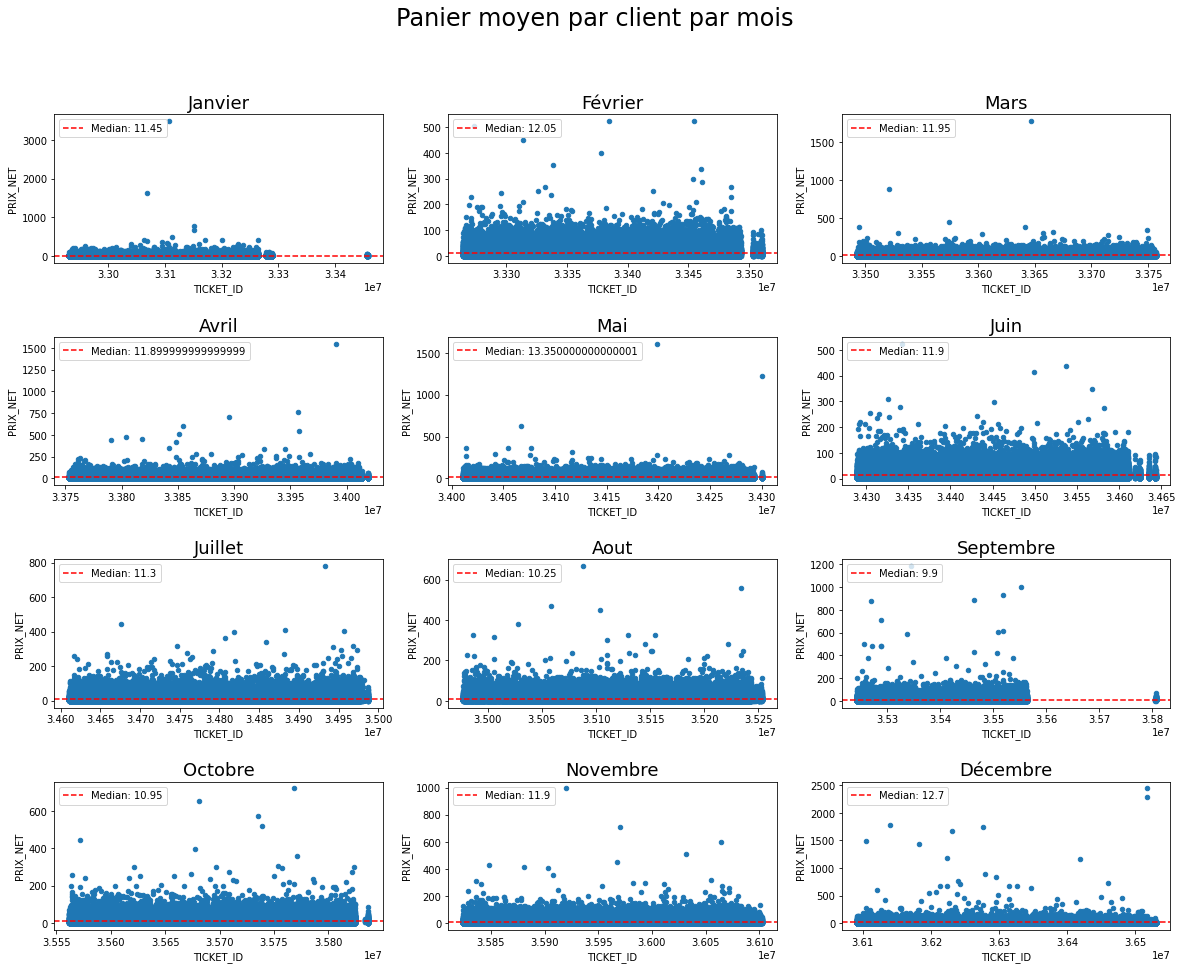

In [46]:
#Calcul des paniers moyens en fonction du ticket_id
ticket = ticket_per_month.filter(["MOIS_VENTE", "TICKET_ID", "PRIX_NET"]).groupby(["MOIS_VENTE", "TICKET_ID"], as_index = True).sum().reset_index()

month = range(1, 13)
nrow=4
ncol=3
df_list = []
fig, axes = plt.subplots(nrow, ncol, figsize=(20,15))
months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Aout", "Septembre", "Octobre", "Novembre", "Décembre"]
count = 0
# color_map = plt.get_cmap('inferno') 
# reversed_color_map = color_map.reversed()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
fig.suptitle("Panier moyen par client par mois", fontsize=24)
for m in month:
    df_list.append(ticket[ticket["MOIS_VENTE"] == m])
for i, ax in enumerate(axes.ravel()): # 2
    ax.set_title(months[i], fontsize=18) # 3
for r in range(nrow):
    for c in range(ncol):
        # df_list[count].plot.scatter(x="TICKET_ID", y="PRIX_NET", ax=axes[r,c], c="PRIX_NET", colormap=reversed_color_map)
        df_list[count].plot.scatter(x="TICKET_ID", y="PRIX_NET", ax=axes[r,c])
        axes[r][c].axhline(y=df_list[count]["PRIX_NET"].median(), c='red', linestyle='dashed', label=f'Median: {df_list[count]["PRIX_NET"].median()}')
        axes[r][c].legend(loc="upper left")
        count += 1

<AxesSubplot:xlabel='Month'>

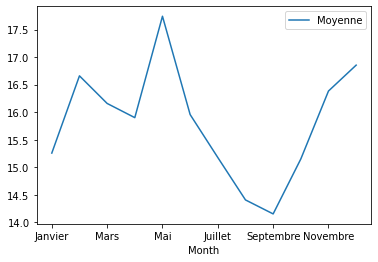

In [47]:
# MOYENNE

months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Aout", "Septembre", "Octobre", "Novembre", "Décembre"]
mean_array = np.empty(12)
for m in month:
    mean_array[m-1] = ticket[ticket["MOIS_VENTE"] == m].filter(["PRIX_NET"]).mean()

pd.DataFrame({
"Month": months,
"Moyenne": mean_array

}).plot.line(x='Month', y='Moyenne')

Text(-1, 2.3, 'average')

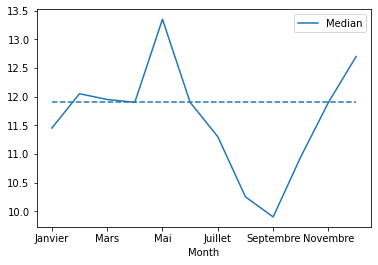

In [48]:
# MEDIANNE

months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Aout", "Septembre", "Octobre", "Novembre", "Décembre"]
mean_array = np.empty(12)
for m in month:
    mean_array[m-1] = ticket[ticket["MOIS_VENTE"] == m].filter(["PRIX_NET"]).median()

axes = pd.DataFrame({
"Month": months,
"Median": mean_array

}).plot.line(x='Month', y='Median')


axes.hlines(np.median(mean_array), 0,11, linestyles='dashed')
axes.annotate('average',(-1,2.3)) 